In [9]:
from utils.line import *

In [8]:
img_path = "/home/rp24/file/test_img/3_1.png"
lower_hsv = np.array([0, 0, 240])   # 直线色域 0 0 245
upper_hsv = np.array([180, 255, 255])


frame = cv2.imread(img_path)
height, width, _ = frame.shape


lines = get_lines(frame, lower_hsv, upper_hsv)


shape of lines: (114, 1, 4)


center: (568.5, 164.5), angle: 135.0, 498, 235 639, 94
center: (368.5, 360.5), angle: 135.0, 298, 431 439, 290
center: (570.0, 166.0), angle: 135.0, 501, 235 639, 97
center: (573.5, 168.5), angle: 135.0, 508, 234 639, 103
center: (565.0, 131.5), angle: 125.8, 491, 234 639, 29
center: (378.5, 386.5), angle: 124.9, 314, 479 443, 294
center: (380.0, 387.5), angle: 125.0, 316, 479 444, 296
center: (353.0, 385.5), angle: 132.9, 266, 479 440, 292
center: (560.0, 114.5), angle: 129.0, 481, 212 639, 17
center: (374.0, 351.0), angle: 135.0, 312, 413 436, 289
center: (563.0, 156.0), angle: 135.0, 487, 232 639, 80
center: (351.0, 382.0), angle: 134.0, 263, 473 439, 291
center: (374.5, 348.5), angle: 135.0, 314, 409 435, 288
center: (388.0, 394.5), angle: 124.9, 329, 479 447, 310
center: (382.0, 389.5), angle: 126.0, 317, 479 447, 300
center: (562.5, 126.5), angle: 125.9, 486, 232 639, 21
center: (562.0, 125.0), angle: 126.0, 485, 231 639, 19
center: (565.5, 146.0), angle: 129.9, 492, 234 639, 58


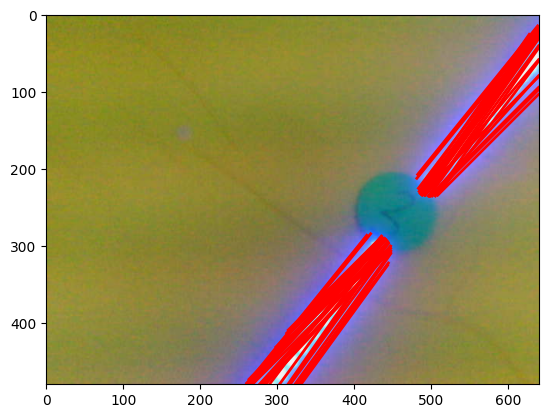

In [4]:
plt.imshow(frame)

# Add lines on the frame
num_start = 0
num_end = num_start + 44
for idx in range(lines[num_start:num_end, ...].shape[0]):
    x0, y0, x1, y1 = lines[idx][0]
    center, angle = calculate_line_center_and_angle(x0, y0, x1, y1)
    print(f"center: {center}, angle: {angle:.1f}, {x0}, {y0} {x1}, {y1}")
    plt.plot([x0, x1], [y0, y1], color='red', linewidth=2)

# Show the plot
plt.show()

# 聚类

In [10]:
keylines = lines[:10, ...]
keylines = keylines.reshape(-1, 4)
keylines.shape

(10, 4)

In [11]:
# from sklearn.cluster import KMeans

# # Create a KMeans object
# kmeans = KMeans(n_clusters = 3)

# # Fit the KMeans model to the line coordinates
# kmeans.fit(keylines)

# # Get the cluster labels for each line
# line_labels = kmeans.labels_

line_labels = cluster(keylines)

# Print the cluster labels
# print(line_labels)
for idx in range(keylines.shape[0]):
    ca = calculate_line_center_and_angle(keylines[idx][0], 
                                         keylines[idx][1],
                                         keylines[idx][2],
                                         keylines[idx][3])
    print(f"{keylines[idx]} {ca}: {line_labels[idx]}")


[498 235 639  94] ((568.5, 164.5), 135.0): 0
[298 431 439 290] ((368.5, 360.5), 135.0): 1
[501 235 639  97] ((570.0, 166.0), 135.0): 0
[508 234 639 103] ((573.5, 168.5), 135.0): 0
[491 234 639  29] ((565.0, 131.5), 125.82744707987375): 0
[314 479 443 294] ((378.5, 386.5), 124.88795968908738): 1
[316 479 444 296] ((380.0, 387.5), 124.97100193849153): 1
[266 479 440 292] ((353.0, 385.5), 132.9376082749202): 1
[481 212 639  17] ((560.0, 114.5), 129.01634241698193): 0
[312 413 436 289] ((374.0, 351.0), 135.0): 1


# capture

In [7]:
cap = cv.VideoCapture(0)

output_dir = "/home/rp24/file/debug_output"

idx = 0

In [24]:
now

datetime.datetime(2024, 4, 9, 16, 3, 33, 216718)

# ref

In [14]:
img_path = "/home/rp24/file/test_img/3_1.png"
frame = cv.imread(img_path)
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

In [9]:
def line_detection(image):
    img = image[range(0, 240, 4), :]  # 截取前半部分
    
    h, w, ch = img.shape
    redLower = np.array([0, 0, 230])
    redUpper = np.array([255, 255, 255])
    hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)  # 转换为HSV空间
    # 根据阈值构建掩膜
    mask = cv.inRange(hsv, redLower, redUpper)
    # 腐蚀操作
    mask = cv.erode(mask, None, iterations=1)
    # 将二值化图像转换为矩阵
    im = np.asarray(mask)

    # 按y轴扫描
    ins = np.zeros(h)
    im = np.insert(im, 0, ins, axis=1)
    x1 = (im != 0).argmax(axis=1)
    im_x2 = im[:, x1.max() + 30:x1.min():-1]
    x2 = (im_x2 != 0).argmax(axis=1)
    x2 = np.size(im_x2, 1) - x2 + x1.min()
    y = np.squeeze(np.nonzero(x1))
    x = np.array((x1[y] + x2[y]) / 2 - 1)
    try:
        if x[0] != x[-1]:
            k = (y[0] - y[-1]) / (x[0] - x[-1]) * 4
            a = round((cmath.atan(k) / 3.14 * 180).real) - 90
            if a <= -90:
                a += 180
        else:
            a = 0
        a += 90    
        d = int(160 - x[-1])
    except:
        a = 999
        d = 999
    return img,a,d